In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

dataframe = pd.read_csv("./AR_Data.csv", sep=";")
dataframe, dataframe_teste = train_test_split(dataframe, test_size=0.4, random_state=1)

classe_teste = dataframe_teste.iloc[:, 4].values
previsores_teste = dataframe_teste.iloc[:, [0,1,2,3]].values
classe = dataframe.iloc[:, 4].values
previsores = dataframe.iloc[:, [0,1,2,3]].values
print(len(previsores), len(previsores_teste))

label_encoder = LabelEncoder()
for i in range(0, 4):
    previsores[:, i] = label_encoder.fit_transform(previsores[:, i])
    previsores_teste[:, i] = label_encoder.fit_transform(previsores_teste[:, i])

scaler_data = StandardScaler()
previsores = scaler_data.fit_transform(previsores)
previsores_teste = scaler_data.fit_transform(previsores_teste)

previsores

300000 200000


array([[-0.36231603,  0.20457245, -0.47840325, -0.57406837],
       [-0.36231603,  0.20457245, -0.47840325,  0.98986654],
       [-0.36231603,  0.20457245, -0.47840325,  0.98986654],
       ...,
       [-0.36231603,  0.20457245, -0.47840325,  2.55380145],
       [-0.36231603,  0.20457245,  2.02440393,  2.55380145],
       [-0.36231603,  0.20457245, -0.47840325,  0.98986654]])

In [3]:
naive_bayes  = GaussianNB()
naive_bayes.fit(previsores, classe)
naive_bayes

GaussianNB()

              precision    recall  f1-score   support

    One-Time       0.41      1.00      0.58     23377
   Recurring       1.00      0.81      0.89    176623

    accuracy                           0.83    200000
   macro avg       0.70      0.90      0.74    200000
weighted avg       0.93      0.83      0.86    200000

0.8313


0.8313

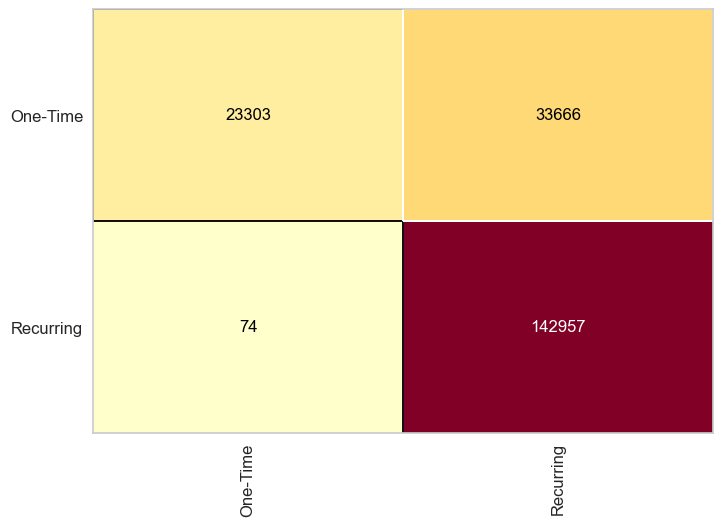

In [7]:
previsores = naive_bayes.predict(previsores_teste)

from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

print(classification_report(previsores, classe_teste))
print(accuracy_score(previsores, classe_teste))
cm = ConfusionMatrix(naive_bayes)
cm.fit(previsores, classe)
cm.score(previsores_teste, classe_teste)
